In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def print_latex(df: pd.DataFrame):
    template = "\\begin{table}\n\\resizebox{\\textwidth}{!}{\n[TABLE]}\n\\caption{}\n\\label{}\n\\end{table}"
    
    table = df.to_latex(
                index=False,
                float_format="{:.2f}".format
            )
    
    print(template.replace("[TABLE]", table))

# LoRA Rank Value Experiment

In [3]:
df = pd.read_csv("../datasets/rvalue_experiment.csv")
df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,_name_or_path,accelerator_config.even_batches,...,total_flos,train/epoch,train/global_step,train/grad_norm,train/learning_rate,train/loss,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv4096-ra...,finished,-,NaN,NaN,2024-07-01T01:17:47.000Z,27010,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.793712e+17,2.983923,348.0,1.651407,2.125159e-07,0.1169,0.319493,26703.2127,0.210,0.013
1,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv2048-ra...,finished,-,NaN,NaN,2024-06-30T19:29:08.000Z,20806,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.617001e+17,2.983923,348.0,1.105907,1.811167e-07,0.1038,0.302758,20629.5277,0.271,0.017
2,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv1024-ra...,finished,-,NaN,NaN,2024-06-30T11:35:16.000Z,28330,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.528645e+17,2.983923,348.0,1.041399,1.811167e-07,0.1215,0.281748,28213.2539,0.198,0.012
3,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv512-ram...,finished,-,NaN,NaN,2024-06-30T06:02:18.000Z,19878,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,1.484468e+17,2.983923,348.0,1.031715,8.055040e-08,0.1502,0.290987,19797.6023,0.283,0.018
4,M-7B-I-v0.2_optawbn8-cdfp16-lr000005-rv256-ram...,failed,-,NaN,NaN,2024-06-30T02:45:23.000Z,11733,NaN,mistralai/Mistral-7B-Instruct-v0.2,True,...,NaN,1.972133,230.0,1.095627,1.557799e-05,0.2866,NaN,NaN,NaN,NaN


In [4]:
def clean_data(df):
    # Drop columns: 'Notes', 'User' and 128 other columns
    df = df.drop(columns=['Notes', 'User', 'Tags', 'Sweep', 'accelerator_config.even_batches', 'accelerator_config.non_blocking', 'accelerator_config.split_batches', 'accelerator_config.use_seedable_sampler', 'adafactor', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'add_cross_attention', 'attention_dropout', 'auto_find_batch_size', 'ddp_timeout', 'disable_tqdm', 'diversity_penalty', 'debug', 'do_eval', 'do_predict', 'do_sample', 'do_train', 'early_stopping', 'encoder_no_repeat_ngram_size', 'eos_token_id', 'eval_delay', 'eval_do_concat_batches', 'eval_on_start', 'fsdp', 'fsdp_config.min_num_params', 'fsdp_config.xla', 'fsdp_config.xla_fsdp_grad_ckpt', 'fsdp_config.xla_fsdp_v2', 'fsdp_min_num_params', 'full_determinism', 'group_by_length', 'hidden_act', 'hidden_size', 'hub_always_push', 'hub_private_repo', 'hub_strategy', 'hub_token', 'id2label.0', 'id2label.1', 'ignore_data_skip', 'include_num_input_tokens_seen', 'include_tokens_per_second', 'initializer_range', 'intermediate_size', 'is_decoder', 'is_encoder_decoder', 'jit_mode_eval', 'label2id.LABEL_0', 'label2id.LABEL_1', 'label_smoothing_factor', 'length_column_name', 'length_penalty', 'load_best_model_at_end', 'local_rank', 'log_level', 'log_level_replica', 'log_on_each_node', 'logging_dir', 'logging_first_step', 'logging_nan_inf_filter', 'logging_steps', 'logging_strategy', 'mp_parameters', 'no_cuda', 'no_repeat_ngram_size', 'num_attention_heads', 'num_beam_groups', 'num_beams', 'num_hidden_layers', 'num_key_value_heads', 'num_of_sequences', 'num_return_sequences', 'output_attentions', 'output_dir', 'output_hidden_states', 'output_scores', 'overwrite_output_dir', 'packing', 'past_index', 'peft_config.default.base_model_name_or_path', 'peft_config.default.bias', 'peft_config.default.fan_in_fan_out', 'peft_config.default.inference_mode', 'peft_config.default.init_lora_weights', 'peft_config.default.megatron_core', 'peft_config.default.peft_type', 'peft_config.default.use_dora', 'peft_config.default.use_rslora', 'prediction_loss_only', 'push_to_hub', 'push_to_hub_token', 'ray_scope', 'remove_invalid_values', 'remove_unused_columns', 'repetition_penalty', 'report_to', 'restore_callback_states_from_checkpoint', 'return_dict', 'return_dict_in_generate', 'rms_norm_eps', 'rope_theta', 'save_on_each_node', 'save_only_model', 'save_safetensors', 'save_steps', 'save_strategy', 'skip_memory_metrics', 'tf_legacy_loss', 'tie_encoder_decoder', 'tie_word_embeddings', 'top_k', 'top_p', 'torch_compile', 'torch_dtype', 'torchscript', 'tpu_metrics_debug', 'transformers_version', 'use_cpu', 'use_ipex', 'use_legacy_prediction_loop', 'use_mps_device', 'vocab_size', 'warmup_steps', 'weight_decay'])
    # Drop columns: 'batch_eval_metrics', 'bf16' and 12 other columns
    df = df.drop(columns=['batch_eval_metrics', 'bf16', 'bf16_full_eval', 'bos_token_id', 'chars_per_token', 'chunk_size_feed_forward', 'dataloader_drop_last', 'dataloader_num_workers', 'dataloader_persistent_workers', 'dataloader_pin_memory', 'dataset_batch_size', 'dataset_num_proc', 'dataset_text_field', 'eval_strategy'])
    # Drop columns: 'Created', 'Runtime' and 53 other columns
    df = df.drop(columns=['Created', 'Runtime', '_name_or_path', 'architectures', 'fp16', 'fp16_backend', 'fp16_full_eval', 'fp16_opt_level', 'generation_config', 'generation_num_beams', 'gradient_accumulation_steps', 'gradient_checkpointing', 'gradient_checkpointing_kwargs.use_reentrant', 'half_precision_backend', 'include_inputs_for_metrics', 'learning_rate', 'lr_scheduler_type', 'max_grad_norm', 'max_length', 'max_position_embeddings', 'max_seq_length', 'max_steps', 'min_length', 'model/num_parameters', 'model_type', 'num_train_epochs', 'optim', 'pad_token_id', 'peft_config.default.lora_alpha', 'peft_config.default.lora_dropout', 'peft_config.default.r', 'peft_config.default.target_modules', 'peft_config.default.task_type', 'per_device_eval_batch_size', 'per_device_train_batch_size', 'predict_with_generate', 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit', 'quantization_config.bnb_4bit_compute_dtype', 'quantization_config.bnb_4bit_quant_storage', 'quantization_config.bnb_4bit_quant_type', 'quantization_config.bnb_4bit_use_double_quant', 'quantization_config.llm_int8_enable_fp32_cpu_offload', 'quantization_config.llm_int8_has_fp16_weight', 'quantization_config.llm_int8_threshold', 'quantization_config.load_in_4bit', 'quantization_config.load_in_8bit', 'quantization_config.quant_method', 'run_name', 'seed', 'temperature', 'typical_p', 'use_bfloat16', 'use_cache', 'warmup_ratio'])
    # Filter rows based on column: 'eval/bleu'
    df = df[df['eval/bleu'].notna()]
    # Drop columns: 'train_runtime', 'train_samples_per_second', 'train_steps_per_second'
    df = df.drop(columns=['train_runtime', 'train_samples_per_second', 'train_steps_per_second'])
    # Drop columns: 'eval/runtime', 'eval/samples_per_second' and 2 other columns
    df = df.drop(columns=['eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'total_flos'])
    # Drop column: 'State'
    df = df.drop(columns=['State'])
    # Drop columns: 'train/global_step', 'train/grad_norm', 'train/learning_rate'
    df = df.drop(columns=['train/global_step', 'train/grad_norm', 'train/learning_rate'])
    # Drop column: 'train_loss'
    df = df.drop(columns=['train_loss'])
    df["Name"] = df["Name"].apply(lambda x: x.split("_")[1].split("-")[3] + " " + x.split("_")[1].split("-")[13])
    df.columns = df.columns.str.removeprefix("eval/").str.removeprefix("train/").str.replace("_", " ")
    
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Name,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross overlap,cross precision,cross recall,cross rr,...,id precision,id recall,id rr,meteor,rouge1,rouge2,rougeL,rougeLsum,epoch,loss
0,rv4096 q8bit,0.275519,0.096774,0.006791,0.005865,0.005779,0.007168,0.006452,0.008065,0.008065,...,0.004839,0.008065,0.008065,0.391805,0.361225,0.291584,0.332307,0.359456,2.983923,0.1169
1,rv2048 q8bit,0.559709,0.653226,0.120043,0.103376,0.104378,0.142438,0.114516,0.169355,0.157258,...,0.091935,0.129032,0.110887,0.592282,0.671698,0.565649,0.623159,0.667069,2.983923,0.1038
2,rv1024 q8bit,0.387918,0.419355,0.084241,0.072608,0.072302,0.107863,0.087097,0.120968,0.106452,...,0.072581,0.088710,0.082258,0.518222,0.509783,0.408613,0.455900,0.504690,2.983923,0.1215
3,rv512 q8bit,0.550970,0.661290,0.107354,0.091502,0.094360,0.135050,0.120968,0.177419,0.155511,...,0.091935,0.112903,0.103091,0.576837,0.640684,0.531439,0.586951,0.636881,2.983923,0.1502
4,rv256 q8bit,0.522921,0.685484,0.112109,0.099626,0.101988,0.151589,0.135484,0.201613,0.157258,...,0.104839,0.137097,0.103495,0.556198,0.635656,0.526193,0.585039,0.633264,1.972133,0.2866


In [5]:
mt_metrics = ["Name", "bleu", "meteor", "rouge1", "rouge2", "rougeL", "rougeLsum", "correct syntax"]
sim_metrics = ["Name", "cross dice coeff", "cross jaccard", "cross overlap", "gnv dice coeff", "gnv jaccard", "gnv overlap", "id dice coeff", "id jaccard", "id overlap",]
ir_metrics = ["Name", "cross map", "cross precision", "cross recall", "cross rr", "gnv map", "gnv precision", "gnv recall", "gnv rr", "id map", "id precision", "id recall", "id rr"]

In [6]:
print_latex(df_clean[mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrr}
\toprule
Name & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
rv4096 q8bit & 0.28 & 0.39 & 0.36 & 0.29 & 0.33 & 0.36 & 0.10 \\
rv2048 q8bit & 0.56 & 0.59 & 0.67 & 0.57 & 0.62 & 0.67 & 0.65 \\
rv1024 q8bit & 0.39 & 0.52 & 0.51 & 0.41 & 0.46 & 0.50 & 0.42 \\
rv512 q8bit & 0.55 & 0.58 & 0.64 & 0.53 & 0.59 & 0.64 & 0.66 \\
rv256 q8bit & 0.52 & 0.56 & 0.64 & 0.53 & 0.59 & 0.63 & 0.69 \\
rv128 q8bit & 0.54 & 0.56 & 0.63 & 0.52 & 0.58 & 0.63 & 0.72 \\
rv4096 q4bit & 0.31 & 0.45 & 0.48 & 0.39 & 0.44 & 0.47 & 0.10 \\
rv2048 q4bit & 0.56 & 0.59 & 0.68 & 0.57 & 0.63 & 0.67 & 0.63 \\
rv1024 q4bit & 0.46 & 0.56 & 0.58 & 0.47 & 0.52 & 0.57 & 0.48 \\
rv512 q4bit & 0.49 & 0.56 & 0.58 & 0.47 & 0.52 & 0.58 & 0.63 \\
rv256 q4bit & 0.54 & 0.57 & 0.65 & 0.54 & 0.60 & 0.65 & 0.67 \\
rv128 q4bit & 0.54 & 0.55 & 0.61 & 0.50 & 0.55 & 0.61 & 0.64 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [7]:
print_latex(df_clean[sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrr}
\toprule
Name & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
rv4096 q8bit & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 \\
rv2048 q8bit & 0.12 & 0.10 & 0.14 & 0.08 & 0.06 & 0.10 & 0.10 & 0.08 & 0.12 \\
rv1024 q8bit & 0.08 & 0.07 & 0.11 & 0.05 & 0.04 & 0.07 & 0.06 & 0.06 & 0.08 \\
rv512 q8bit & 0.11 & 0.09 & 0.14 & 0.08 & 0.06 & 0.10 & 0.08 & 0.07 & 0.10 \\
rv256 q8bit & 0.11 & 0.10 & 0.15 & 0.08 & 0.06 & 0.10 & 0.09 & 0.08 & 0.10 \\
rv128 q8bit & 0.10 & 0.09 & 0.15 & 0.06 & 0.05 & 0.10 & 0.08 & 0.07 & 0.12 \\
rv4096 q4bit & 0.01 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.01 & 0.01 & 0.01 \\
rv2048 q4bit & 0.10 & 0.09 & 0.14 & 0.07 & 0.05 & 0.10 & 0.07 & 0.06 & 0.10 \\
rv1024 q4bit & 0.06 & 0.05 & 0.08 & 0.04 & 0.03 & 0.05 & 0.05 & 0.04 & 0.05 \\
rv512 q4bit & 0.13 & 0.12 & 0.16 & 0.09 & 0.07 & 0.12 & 0.1

In [8]:
print_latex(df_clean[ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Name & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
rv4096 q8bit & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.01 & 0.01 & 0.00 & 0.01 & 0.01 \\
rv2048 q8bit & 0.10 & 0.11 & 0.17 & 0.16 & 0.06 & 0.08 & 0.11 & 0.09 & 0.08 & 0.09 & 0.13 & 0.11 \\
rv1024 q8bit & 0.07 & 0.09 & 0.12 & 0.11 & 0.04 & 0.08 & 0.10 & 0.06 & 0.06 & 0.07 & 0.09 & 0.08 \\
rv512 q8bit & 0.09 & 0.12 & 0.18 & 0.16 & 0.06 & 0.09 & 0.10 & 0.09 & 0.07 & 0.09 & 0.11 & 0.10 \\
rv256 q8bit & 0.10 & 0.14 & 0.20 & 0.16 & 0.07 & 0.11 & 0.15 & 0.09 & 0.08 & 0.10 & 0.14 & 0.10 \\
rv128 q8bit & 0.09 & 0.11 & 0.18 & 0.15 & 0.05 & 0.07 & 0.11 & 0.10 & 0.07 & 0.09 & 0.12 & 0.12 \\
rv4096 q4bit & 0.01 & 0.01 & 0.02 & 0.02 & 0.00 & 0.01 & 0.02 & 0.00 & 0.01 & 0.01 & 0.02 & 0.02 \\
rv2048 q4bit & 0.09 & 0.13 & 0.15 & 0.16 & 0.05 & 0.08 & 

# Basic vs Template pipeline experiment

In [9]:
def clean_data_b_v_t(df):
    # Drop columns: 'Notes', 'User' and 128 other columns
    df = df.drop(columns=['Notes', 'User', 'Tags', 'Sweep', 'accelerator_config.even_batches', 'accelerator_config.non_blocking', 'accelerator_config.split_batches', 'accelerator_config.use_seedable_sampler', 'adafactor', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'add_cross_attention', 'attention_dropout', 'auto_find_batch_size', 'ddp_timeout', 'disable_tqdm', 'diversity_penalty', 'debug', 'do_eval', 'do_predict', 'do_sample', 'do_train', 'early_stopping', 'encoder_no_repeat_ngram_size', 'eos_token_id', 'eval_delay', 'eval_do_concat_batches', 'eval_on_start', 'fsdp', 'fsdp_config.min_num_params', 'fsdp_config.xla', 'fsdp_config.xla_fsdp_grad_ckpt', 'fsdp_config.xla_fsdp_v2', 'fsdp_min_num_params', 'full_determinism', 'group_by_length', 'hidden_act', 'hidden_size', 'hub_always_push', 'hub_private_repo', 'hub_strategy', 'hub_token', 'id2label.0', 'id2label.1', 'ignore_data_skip', 'include_num_input_tokens_seen', 'include_tokens_per_second', 'initializer_range', 'intermediate_size', 'is_decoder', 'is_encoder_decoder', 'jit_mode_eval', 'label2id.LABEL_0', 'label2id.LABEL_1', 'label_smoothing_factor', 'length_column_name', 'length_penalty', 'load_best_model_at_end', 'local_rank', 'log_level', 'log_level_replica', 'log_on_each_node', 'logging_dir', 'logging_first_step', 'logging_nan_inf_filter', 'logging_steps', 'logging_strategy', 'mp_parameters', 'no_cuda', 'no_repeat_ngram_size', 'num_attention_heads', 'num_beam_groups', 'num_beams', 'num_hidden_layers', 'num_key_value_heads', 'num_of_sequences', 'num_return_sequences', 'output_attentions', 'output_dir', 'output_hidden_states', 'output_scores', 'overwrite_output_dir', 'packing', 'past_index', 'peft_config.default.base_model_name_or_path', 'peft_config.default.bias', 'peft_config.default.fan_in_fan_out', 'peft_config.default.inference_mode', 'peft_config.default.init_lora_weights', 'peft_config.default.megatron_core', 'peft_config.default.peft_type', 'peft_config.default.use_dora', 'peft_config.default.use_rslora', 'prediction_loss_only', 'push_to_hub', 'push_to_hub_token', 'ray_scope', 'remove_invalid_values', 'remove_unused_columns', 'repetition_penalty', 'report_to', 'restore_callback_states_from_checkpoint', 'return_dict', 'return_dict_in_generate', 'rms_norm_eps', 'rope_theta', 'save_on_each_node', 'save_only_model', 'save_safetensors', 'save_steps', 'save_strategy', 'skip_memory_metrics', 'tf_legacy_loss', 'tie_encoder_decoder', 'tie_word_embeddings', 'top_k', 'top_p', 'torch_compile', 'torch_dtype', 'torchscript', 'tpu_metrics_debug', 'transformers_version', 'use_cpu', 'use_ipex', 'use_legacy_prediction_loop', 'use_mps_device', 'vocab_size', 'warmup_steps', 'weight_decay'])
    # Drop columns: 'batch_eval_metrics', 'bf16' and 12 other columns
    df = df.drop(columns=['batch_eval_metrics', 'bf16', 'bf16_full_eval', 'bos_token_id', 'chars_per_token', 'chunk_size_feed_forward', 'dataloader_drop_last', 'dataloader_num_workers', 'dataloader_persistent_workers', 'dataloader_pin_memory', 'dataset_batch_size', 'dataset_num_proc', 'dataset_text_field', 'eval_strategy'])
    # Drop columns: 'Created', 'Runtime' and 53 other columns
    df = df.drop(columns=['Created', 'Runtime', '_name_or_path', 'architectures', 'fp16', 'fp16_backend', 'fp16_full_eval', 'fp16_opt_level', 'generation_config', 'generation_num_beams', 'gradient_accumulation_steps', 'gradient_checkpointing', 'gradient_checkpointing_kwargs.use_reentrant', 'half_precision_backend', 'include_inputs_for_metrics', 'learning_rate', 'lr_scheduler_type', 'max_grad_norm', 'max_length', 'max_position_embeddings', 'max_seq_length', 'max_steps', 'min_length', 'model/num_parameters', 'model_type', 'num_train_epochs', 'optim', 'pad_token_id', 'peft_config.default.lora_alpha', 'peft_config.default.lora_dropout', 'peft_config.default.r', 'peft_config.default.target_modules', 'peft_config.default.task_type', 'per_device_eval_batch_size', 'per_device_train_batch_size', 'predict_with_generate', 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit', 'quantization_config.bnb_4bit_compute_dtype', 'quantization_config.bnb_4bit_quant_storage', 'quantization_config.bnb_4bit_quant_type', 'quantization_config.bnb_4bit_use_double_quant', 'quantization_config.llm_int8_enable_fp32_cpu_offload', 'quantization_config.llm_int8_has_fp16_weight', 'quantization_config.llm_int8_threshold', 'quantization_config.load_in_4bit', 'quantization_config.load_in_8bit', 'quantization_config.quant_method', 'run_name', 'seed', 'temperature', 'typical_p', 'use_bfloat16', 'use_cache', 'warmup_ratio'])
    # Filter rows based on column: 'eval/bleu'
    df = df[df['eval/bleu'].notna()]
    # Drop columns: 'train_runtime', 'train_samples_per_second', 'train_steps_per_second'
    df = df.drop(columns=['train_runtime', 'train_samples_per_second', 'train_steps_per_second'])
    # Drop columns: 'eval/runtime', 'eval/samples_per_second' and 2 other columns
    df = df.drop(columns=['eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'total_flos'])
    # Drop column: 'State'
    df = df.drop(columns=['State'])
    # Drop columns: 'train/global_step', 'train/grad_norm', 'train/learning_rate'
    df = df.drop(columns=['train/global_step', 'train/grad_norm', 'train/learning_rate', 'eval_use_gather_object', 'peft_config.default.runtime_config.ephemeral_gpu_offload'])
    # Drop column: 'train_loss'
    df = df.drop(columns=['train_loss'])
    df["Name"] = df["Name"].apply(lambda x: x.split("_")[1].split("-")[3] + " " + x.split("_")[1].split("-")[14] + " " + x.split("_")[1].split("-")[15])
    df.columns = df.columns.str.removeprefix("eval/").str.removeprefix("train/").str.replace("_", " ")
    return df

## Basic vs Labelized on Mistral Instructions

In [10]:
df_b_v_t = pd.read_csv("../datasets/basic_vs_template_experiment.csv")

df_clean_b_v_t = clean_data_b_v_t(df_b_v_t)
df_clean_b_v_t.head()

,Name,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross overlap,cross precision,cross recall,cross rr,...,id precision,id recall,id rr,meteor,rouge1,rouge2,rougeL,rougeLsum,epoch,loss
0,rv2048 template template,0.544956,0.258065,0.045766,0.037256,0.039886,0.075806,0.041935,0.088710,0.076613,...,0.038710,0.072581,0.062500,0.565976,0.633466,0.527842,0.584914,0.629361,2.983923,0.1003
1,rv2048 template basic,0.401952,0.338710,0.042763,0.039116,0.038385,0.051094,0.041935,0.072581,0.058065,...,0.030645,0.048387,0.042339,0.511377,0.516339,0.420814,0.475223,0.513245,2.983923,0.1054
2,rv2048 basic template,0.321934,0.838710,0.029490,0.027032,0.026542,0.049818,0.037097,0.072581,0.058468,...,0.022581,0.040323,0.026210,0.517635,0.539490,0.353272,0.490981,0.536522,2.983923,0.2624
3,rv2048 basic basic,0.322684,0.830645,0.043197,0.036799,0.035821,0.068118,0.061290,0.088710,0.074194,...,0.043548,0.056452,0.056452,0.501285,0.520695,0.348611,0.474358,0.516670,2.983923,0.2618
4,rv512 template template,0.414397,0.564516,0.115958,0.100748,0.099985,0.149499,0.120968,0.177419,0.151882,...,0.090323,0.120968,0.099462,0.524606,0.510924,0.405370,0.447891,0.504695,2.983923,0.1491


In [11]:
print_latex(df_clean_b_v_t[mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrr}
\toprule
Name & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
rv2048 template template & 0.54 & 0.57 & 0.63 & 0.53 & 0.58 & 0.63 & 0.26 \\
rv2048 template basic & 0.40 & 0.51 & 0.52 & 0.42 & 0.48 & 0.51 & 0.34 \\
rv2048 basic template & 0.32 & 0.52 & 0.54 & 0.35 & 0.49 & 0.54 & 0.84 \\
rv2048 basic basic & 0.32 & 0.50 & 0.52 & 0.35 & 0.47 & 0.52 & 0.83 \\
rv512 template template & 0.41 & 0.52 & 0.51 & 0.41 & 0.45 & 0.50 & 0.56 \\
rv512 template basic & 0.47 & 0.56 & 0.57 & 0.45 & 0.50 & 0.56 & 0.64 \\
rv512 basic template & 0.32 & 0.49 & 0.49 & 0.31 & 0.44 & 0.49 & 0.85 \\
rv512 basic basic & 0.30 & 0.48 & 0.47 & 0.30 & 0.41 & 0.46 & 0.88 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [12]:
print_latex(df_clean_b_v_t[sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrr}
\toprule
Name & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
rv2048 template template & 0.05 & 0.04 & 0.08 & 0.03 & 0.02 & 0.06 & 0.04 & 0.03 & 0.07 \\
rv2048 template basic & 0.04 & 0.04 & 0.05 & 0.02 & 0.02 & 0.03 & 0.03 & 0.02 & 0.04 \\
rv2048 basic template & 0.03 & 0.03 & 0.05 & 0.02 & 0.02 & 0.03 & 0.03 & 0.02 & 0.03 \\
rv2048 basic basic & 0.04 & 0.04 & 0.07 & 0.03 & 0.02 & 0.05 & 0.03 & 0.03 & 0.05 \\
rv512 template template & 0.12 & 0.10 & 0.15 & 0.07 & 0.05 & 0.09 & 0.08 & 0.08 & 0.10 \\
rv512 template basic & 0.08 & 0.07 & 0.11 & 0.06 & 0.05 & 0.07 & 0.07 & 0.06 & 0.08 \\
rv512 basic template & 0.01 & 0.01 & 0.03 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 \\
rv512 basic basic & 0.03 & 0.03 & 0.06 & 0.01 & 0.01 & 0.02 & 0.01 & 0.01 & 0.02 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [13]:
print_latex(df_clean_b_v_t[ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Name & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
rv2048 template template & 0.04 & 0.04 & 0.09 & 0.08 & 0.02 & 0.04 & 0.07 & 0.07 & 0.03 & 0.04 & 0.07 & 0.06 \\
rv2048 template basic & 0.04 & 0.04 & 0.07 & 0.06 & 0.02 & 0.04 & 0.06 & 0.05 & 0.02 & 0.03 & 0.05 & 0.04 \\
rv2048 basic template & 0.03 & 0.04 & 0.07 & 0.06 & 0.01 & 0.02 & 0.04 & 0.03 & 0.02 & 0.02 & 0.04 & 0.03 \\
rv2048 basic basic & 0.04 & 0.06 & 0.09 & 0.07 & 0.02 & 0.04 & 0.05 & 0.06 & 0.03 & 0.04 & 0.06 & 0.06 \\
rv512 template template & 0.10 & 0.12 & 0.18 & 0.15 & 0.05 & 0.09 & 0.12 & 0.11 & 0.08 & 0.09 & 0.12 & 0.10 \\
rv512 template basic & 0.06 & 0.08 & 0.13 & 0.11 & 0.05 & 0.06 & 0.09 & 0.07 & 0.06 & 0.06 & 0.08 & 0.10 \\
rv512 basic template & 0.01 & 0.02 & 0.04 & 0.03 & 0.01 & 0.01 & 0.02 & 0.02 & 0.01 & 0.01 & 0.02 &

## Basic vs Labelized on Llama3 Instructions

In [14]:
df_b_v_t_on_llama3 = pd.read_csv("../datasets/basic_vs_template_on_llama3_instructions.csv")

df_b_v_t_on_llama3['eval/id_map'] = df_b_v_t_on_llama3['eval/id_map'].combine_first(df_b_v_t_on_llama3['eval/id_mean_average_precision'])
df_b_v_t_on_llama3['eval/gnv_map'] = df_b_v_t_on_llama3['eval/gnv_map'].combine_first(df_b_v_t_on_llama3['eval/gnv_mean_average_precision'])
df_b_v_t_on_llama3['eval/cross_map'] = df_b_v_t_on_llama3['eval/cross_map'].combine_first(df_b_v_t_on_llama3['eval/cross_mean_average_precision'])

df_b_v_t_on_llama3['eval/id_rr'] = df_b_v_t_on_llama3['eval/id_rr'].combine_first(df_b_v_t_on_llama3['eval/id_mean_reciprocal_rank'])
df_b_v_t_on_llama3['eval/gnv_rr'] = df_b_v_t_on_llama3['eval/gnv_rr'].combine_first(df_b_v_t_on_llama3['eval/gnv_mean_reciprocal_rank'])
df_b_v_t_on_llama3['eval/cross_rr'] = df_b_v_t_on_llama3['eval/cross_rr'].combine_first(df_b_v_t_on_llama3['eval/cross_mean_reciprocal_rank'])

df_clean_b_v_t_on_llama3 = clean_data_b_v_t(df_b_v_t_on_llama3)
df_clean_b_v_t_on_llama3.head()

,Name,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross mean average precision,cross mean reciprocal rank,cross overlap,cross precision,...,id precision,id recall,id rr,meteor,rouge1,rouge2,rougeL,rougeLsum,epoch,loss
0,rv512 template basic,0.436800,0.596774,0.098800,0.082822,0.082221,0.082221,0.147177,0.136864,0.120968,...,0.090323,0.112903,0.104839,0.540846,0.545632,0.438881,0.487727,0.539195,2.983923,0.1487
1,rv512 basic template,0.249992,0.741935,0.021390,0.016046,0.015882,0.015882,0.031586,0.032680,0.022581,...,0.017742,0.032258,0.022849,0.458358,0.436379,0.267877,0.377702,0.427290,2.983923,0.3407
2,rv2048 template template,0.391593,0.233871,0.060189,0.057101,0.061506,0.061506,0.075269,0.067987,0.054839,...,0.041935,0.056452,0.055108,0.523701,0.530712,0.439156,0.480818,0.526404,2.983923,0.1030
3,rv2048 template basic,0.469301,0.387097,0.055448,0.046526,0.047177,0.047177,0.088710,0.078248,0.069355,...,0.045161,0.072581,0.066532,0.574136,0.604016,0.500965,0.557443,0.596132,2.983923,0.1063
4,rv2048 basic template,0.175812,0.379032,0.011787,0.008075,0.008416,0.008416,0.016129,0.016935,0.012903,...,0.006452,0.008065,0.008065,0.435877,0.408718,0.260395,0.359685,0.404044,2.983923,0.2610


In [15]:
print_latex(df_clean_b_v_t_on_llama3[mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrr}
\toprule
Name & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
rv512 template basic & 0.44 & 0.54 & 0.55 & 0.44 & 0.49 & 0.54 & 0.60 \\
rv512 basic template & 0.25 & 0.46 & 0.44 & 0.27 & 0.38 & 0.43 & 0.74 \\
rv2048 template template & 0.39 & 0.52 & 0.53 & 0.44 & 0.48 & 0.53 & 0.23 \\
rv2048 template basic & 0.47 & 0.57 & 0.60 & 0.50 & 0.56 & 0.60 & 0.39 \\
rv2048 basic template & 0.18 & 0.44 & 0.41 & 0.26 & 0.36 & 0.40 & 0.38 \\
rv2048 basic basic & 0.32 & 0.50 & 0.50 & 0.33 & 0.45 & 0.50 & 0.77 \\
rv512 template template & 0.42 & 0.52 & 0.54 & 0.43 & 0.48 & 0.53 & 0.50 \\
rv512 basic basic & 0.24 & 0.47 & 0.40 & 0.25 & 0.34 & 0.40 & 0.75 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [16]:
print_latex(df_clean_b_v_t_on_llama3[sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrr}
\toprule
Name & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
rv512 template basic & 0.10 & 0.08 & 0.14 & 0.07 & 0.05 & 0.12 & 0.07 & 0.06 & 0.11 \\
rv512 basic template & 0.02 & 0.02 & 0.03 & 0.01 & 0.01 & 0.02 & 0.01 & 0.01 & 0.02 \\
rv2048 template template & 0.06 & 0.06 & 0.07 & 0.04 & 0.03 & 0.05 & 0.05 & 0.05 & 0.06 \\
rv2048 template basic & 0.06 & 0.05 & 0.08 & 0.04 & 0.03 & 0.06 & 0.04 & 0.03 & 0.04 \\
rv2048 basic template & 0.01 & 0.01 & 0.02 & 0.01 & 0.00 & 0.01 & 0.00 & 0.00 & 0.01 \\
rv2048 basic basic & 0.04 & 0.03 & 0.06 & 0.02 & 0.01 & 0.04 & 0.02 & 0.02 & 0.04 \\
rv512 template template & 0.10 & 0.09 & 0.12 & 0.06 & 0.05 & 0.09 & 0.08 & 0.07 & 0.09 \\
rv512 basic basic & 0.04 & 0.04 & 0.05 & 0.01 & 0.01 & 0.02 & 0.02 & 0.02 & 0.03 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [17]:
print_latex(df_clean_b_v_t_on_llama3[ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Name & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
rv512 template basic & 0.08 & 0.12 & 0.19 & 0.15 & 0.05 & 0.09 & 0.12 & 0.12 & 0.06 & 0.09 & 0.11 & 0.10 \\
rv512 basic template & 0.02 & 0.02 & 0.05 & 0.03 & 0.01 & 0.02 & 0.02 & 0.01 & 0.01 & 0.02 & 0.03 & 0.02 \\
rv2048 template template & 0.06 & 0.05 & 0.07 & 0.08 & 0.03 & 0.03 & 0.03 & 0.05 & 0.05 & 0.04 & 0.06 & 0.06 \\
rv2048 template basic & 0.05 & 0.07 & 0.11 & 0.09 & 0.03 & 0.05 & 0.07 & 0.08 & 0.03 & 0.05 & 0.07 & 0.07 \\
rv2048 basic template & 0.01 & 0.01 & 0.02 & 0.02 & 0.00 & 0.01 & 0.02 & 0.02 & 0.00 & 0.01 & 0.01 & 0.01 \\
rv2048 basic basic & 0.03 & 0.06 & 0.06 & 0.06 & 0.01 & 0.05 & 0.06 & 0.04 & 0.02 & 0.05 & 0.05 & 0.04 \\
rv512 template template & 0.09 & 0.10 & 0.19 & 0.16 & 0.05 & 0.10 & 0.13 & 0.10 & 0.07 & 0.09 & 0.14 &

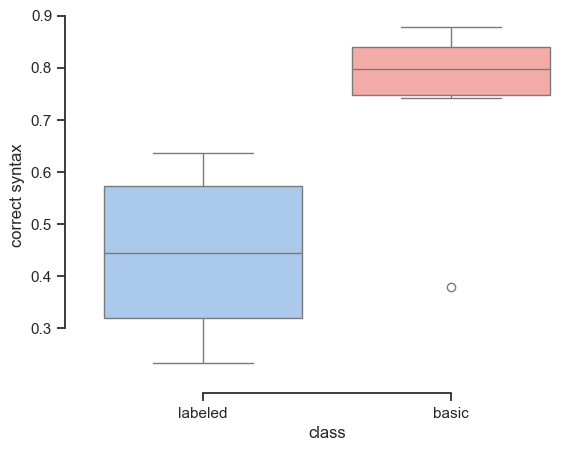

In [18]:
mixed = pd.concat([df_clean_b_v_t, df_clean_b_v_t_on_llama3])
data = mixed.apply(lambda x: x['Name'].split(' ')[1] + " " + str(x['correct syntax']), axis=1).to_list()
classs = [x.split(' ')[0] for x in data]
correct_syntaxs = [x.split(' ')[1] for x in data]
data = {
    "class": [x.replace("template", "labeled") for x in classs],
    "correct syntax": [float(x) for x in correct_syntaxs]
}
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="class", y="correct syntax",
            hue="class", palette=["b", "r"],
            data=data)
sns.despine(offset=10, trim=True)

# Baseline evaluations

In [19]:
def clean_data_baselines(df):
    # Drop columns: 'Notes', 'User' and 128 other columns
    df = df.drop(columns=['Notes', 'User', 'Tags', 'Sweep', 'accelerator_config.even_batches', 'accelerator_config.non_blocking', 'accelerator_config.split_batches', 'accelerator_config.use_seedable_sampler', 'adafactor', 'adam_beta1', 'adam_beta2', 'adam_epsilon', 'add_cross_attention', 'attention_dropout', 'auto_find_batch_size', 'ddp_timeout', 'disable_tqdm', 'diversity_penalty', 'debug', 'do_eval', 'do_predict', 'do_sample', 'do_train', 'early_stopping', 'encoder_no_repeat_ngram_size', 'eos_token_id', 'eval_delay', 'eval_do_concat_batches', 'eval_on_start', 'fsdp', 'fsdp_config.min_num_params', 'fsdp_config.xla', 'fsdp_config.xla_fsdp_grad_ckpt', 'fsdp_config.xla_fsdp_v2', 'fsdp_min_num_params', 'full_determinism', 'group_by_length', 'hidden_act', 'hidden_size', 'hub_always_push', 'hub_private_repo', 'hub_strategy', 'hub_token', 'id2label.0', 'id2label.1', 'ignore_data_skip', 'include_num_input_tokens_seen', 'include_tokens_per_second', 'initializer_range', 'intermediate_size', 'is_decoder', 'is_encoder_decoder', 'jit_mode_eval', 'label2id.LABEL_0', 'label2id.LABEL_1', 'label_smoothing_factor', 'length_column_name', 'length_penalty', 'load_best_model_at_end', 'local_rank', 'log_level', 'log_level_replica', 'log_on_each_node', 'logging_dir', 'logging_first_step', 'logging_nan_inf_filter', 'logging_steps', 'logging_strategy', 'mp_parameters', 'no_cuda', 'no_repeat_ngram_size', 'num_attention_heads', 'num_beam_groups', 'num_beams', 'num_hidden_layers', 'num_key_value_heads', 'num_of_sequences', 'num_return_sequences', 'output_attentions', 'output_dir', 'output_hidden_states', 'output_scores', 'overwrite_output_dir', 'packing', 'past_index', 'peft_config.default.base_model_name_or_path', 'peft_config.default.bias', 'peft_config.default.fan_in_fan_out', 'peft_config.default.inference_mode', 'peft_config.default.init_lora_weights', 'peft_config.default.megatron_core', 'peft_config.default.peft_type', 'peft_config.default.use_dora', 'peft_config.default.use_rslora', 'prediction_loss_only', 'push_to_hub', 'push_to_hub_token', 'ray_scope', 'remove_invalid_values', 'remove_unused_columns', 'repetition_penalty', 'report_to', 'restore_callback_states_from_checkpoint', 'return_dict', 'return_dict_in_generate', 'rms_norm_eps', 'rope_theta', 'save_on_each_node', 'save_only_model', 'save_safetensors', 'save_steps', 'save_strategy', 'skip_memory_metrics', 'tf_legacy_loss', 'tie_encoder_decoder', 'tie_word_embeddings', 'top_k', 'top_p', 'torch_compile', 'torch_dtype', 'torchscript', 'tpu_metrics_debug', 'transformers_version', 'use_cpu', 'use_ipex', 'use_legacy_prediction_loop', 'use_mps_device', 'vocab_size', 'warmup_steps', 'weight_decay'])
    # Drop columns: 'batch_eval_metrics', 'bf16' and 12 other columns
    df = df.drop(columns=['batch_eval_metrics', 'bf16', 'bf16_full_eval', 'bos_token_id', 'chars_per_token', 'chunk_size_feed_forward', 'dataloader_drop_last', 'dataloader_num_workers', 'dataloader_persistent_workers', 'dataloader_pin_memory', 'dataset_batch_size', 'dataset_num_proc', 'dataset_text_field', 'eval_strategy'])
    # Drop columns: 'Created', 'Runtime' and 53 other columns
    df = df.drop(columns=['Created', 'Runtime', '_name_or_path', 'architectures', 'fp16', 'fp16_backend', 'fp16_full_eval', 'fp16_opt_level', 'generation_config', 'generation_num_beams', 'gradient_accumulation_steps', 'gradient_checkpointing', 'gradient_checkpointing_kwargs.use_reentrant', 'half_precision_backend', 'include_inputs_for_metrics', 'learning_rate', 'lr_scheduler_type', 'max_grad_norm', 'max_length', 'max_position_embeddings', 'max_seq_length', 'max_steps', 'min_length', 'model/num_parameters', 'model_type', 'num_train_epochs', 'optim', 'pad_token_id', 'peft_config.default.lora_alpha', 'peft_config.default.lora_dropout', 'peft_config.default.r', 'peft_config.default.target_modules', 'peft_config.default.task_type', 'per_device_eval_batch_size', 'per_device_train_batch_size', 'predict_with_generate', 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit', 'quantization_config.bnb_4bit_compute_dtype', 'quantization_config.bnb_4bit_quant_storage', 'quantization_config.bnb_4bit_quant_type', 'quantization_config.bnb_4bit_use_double_quant', 'quantization_config.llm_int8_enable_fp32_cpu_offload', 'quantization_config.llm_int8_has_fp16_weight', 'quantization_config.llm_int8_threshold', 'quantization_config.load_in_4bit', 'quantization_config.load_in_8bit', 'quantization_config.quant_method', 'run_name', 'seed', 'temperature', 'typical_p', 'use_bfloat16', 'use_cache', 'warmup_ratio'])
    # Filter rows based on column: 'eval/bleu'
    df = df[df['eval/bleu'].notna()]
    # Drop columns: 'train_runtime', 'train_samples_per_second', 'train_steps_per_second'
    df = df.drop(columns=['train_runtime', 'train_samples_per_second', 'train_steps_per_second'])
    # Drop columns: 'eval/runtime', 'eval/samples_per_second' and 2 other columns
    df = df.drop(columns=['eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'total_flos'])
    # Drop column: 'State'
    df = df.drop(columns=['State'])
    # Drop columns: 'train/global_step'
    df = df.drop(columns=['train/global_step', 'eval_use_gather_object', 'peft_config.default.runtime_config.ephemeral_gpu_offload'])
    # Drop column: 'train_loss'
    df = df.drop(columns=['train_loss'])
    
    df = df.fillna({'cross map': 0, 'cross mean average precision': 0, 'cross mean reciprocal rank': 0, 'cross overlap': 0, 'cross precision': 0, 'cross recall': 0, 'cross rr': 0, 'gnv dice coeff': 0, 'gnv jaccard': 0, 'gnv map': 0, 'gnv mean average precision': 0, 'gnv mean reciprocal rank': 0, 'gnv overlap': 0, 'gnv precision': 0, 'gnv recall': 0, 'gnv rr': 0, 'id dice coeff': 0, 'id jaccard': 0, 'id map': 0, 'id mean average precision': 0, 'id mean reciprocal rank': 0, 'id overlap': 0, 'id precision': 0, 'id recall': 0, 'id rr': 0, 'meteor': 0, 'rouge1': 0, 'rouge2': 0, 'rougeL': 0, 'rougeLsum': 0, 'cross jaccard': 0, 'cross dice coeff': 0, 'correct syntax': 0, 'bleu': 0})
    
    df["Name"] = df["Name"].apply(lambda x: x.split("_")[1].split("-")[14] + " " + x.split("_")[1].split("-")[15])
    df.columns = df.columns.str.removeprefix("eval/").str.removeprefix("train/").str.replace("_", " ")
    return df

## Mistral on Mistral instructions

In [20]:
df_bases = pd.read_csv("../datasets/baselines.csv")

df_clean_bases = clean_data_baselines(df_bases)
df_clean_bases.head()

,Name,bleu,correct syntax,cross dice coeff,cross jaccard,cross map,cross overlap,cross precision,cross recall,cross rr,...,id overlap,id precision,id recall,id rr,meteor,rouge1,rouge2,rougeL,rougeLsum,epoch
0,template template,0.204011,0,0,0,0,0,0,0,0,...,0,0,0,0,0.321231,0.323863,0.098988,0.243093,0.318335,0
1,template basic,0.205702,0,0,0,0,0,0,0,0,...,0,0,0,0,0.325341,0.320638,0.102408,0.244984,0.315050,0
2,basic template,0.063296,0,0,0,0,0,0,0,0,...,0,0,0,0,0.291334,0.177657,0.045169,0.131372,0.173573,0
3,basic basic,0.072811,0,0,0,0,0,0,0,0,...,0,0,0,0,0.307618,0.192210,0.059633,0.143715,0.189447,0


In [21]:
print_latex(df_clean_bases[mt_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrr}
\toprule
Name & bleu & meteor & rouge1 & rouge2 & rougeL & rougeLsum & correct syntax \\
\midrule
template template & 0.20 & 0.32 & 0.32 & 0.10 & 0.24 & 0.32 & 0 \\
template basic & 0.21 & 0.33 & 0.32 & 0.10 & 0.24 & 0.32 & 0 \\
basic template & 0.06 & 0.29 & 0.18 & 0.05 & 0.13 & 0.17 & 0 \\
basic basic & 0.07 & 0.31 & 0.19 & 0.06 & 0.14 & 0.19 & 0 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [22]:
print_latex(df_clean_bases[sim_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrr}
\toprule
Name & cross dice coeff & cross jaccard & cross overlap & gnv dice coeff & gnv jaccard & gnv overlap & id dice coeff & id jaccard & id overlap \\
\midrule
template template & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
template basic & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
basic template & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
basic basic & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


In [23]:
print_latex(df_clean_bases[ir_metrics])

\begin{table}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Name & cross map & cross precision & cross recall & cross rr & gnv map & gnv precision & gnv recall & gnv rr & id map & id precision & id recall & id rr \\
\midrule
template template & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
template basic & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
basic template & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
basic basic & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\bottomrule
\end{tabular}
}
\caption{}
\label{}
\end{table}


## Mistral on Llama 3 evaluation